# 14 数据分析示例

## 14.1 从Bitly获取1.USA.gov数据

In [1]:
# 用户匿名数据，每一行都包含一种通用形式的web数据，为json格式
import json

lines = []
with open("./examples/example.txt", 'r') as f:
    for line in f:
        lines.append(line)

In [2]:
# 返回一个Python字典的列表
records = [json.loads(lines[i]) for i in range(0, len(lines))]

In [3]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [4]:
# 提取时区
timestamp_zone = [rec['tz'] for rec in records if 'tz' in rec]

In [5]:
# 删除空置
tz = [i for i in timestamp_zone if i != '']

In [6]:
# 遍历时区，用字典来存储计数
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [7]:
from collections import defaultdict


def get_counts2(sequence):
    counts = defaultdict(int)  # 将值初始化为0
    for x in sequence:
        counts[x] += 1
    return counts

In [8]:
counts = get_counts(timestamp_zone)
counts['America/New_York']

1251

In [9]:
len(timestamp_zone)

3440

In [10]:
# 取前10的时区和它们的计数
def top10_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort(reverse=True)
    return value_key_pairs[:10]

In [11]:
top10_counts(counts)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

In [12]:
# 使用标准库collections.Counter更简单
from collections import Counter

counts = Counter(timestamp_zone)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 14.1.2 使用pandas进行时区计数

In [13]:
import pandas as pd

frame = pd.DataFrame(records)
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [14]:
clean_tz = frame.tz.fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

<AxesSubplot:>

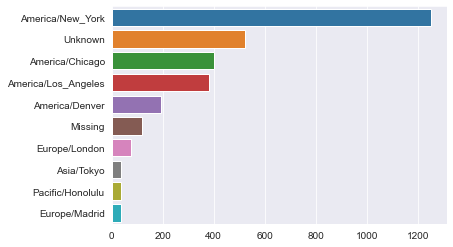

In [15]:
# 绘图
import seaborn as sns

#%matplotlib notebook

tz_top10 = clean_tz.value_counts()[:10]
sns.barplot(y=tz_top10.index, x=tz_top10.values)

In [18]:
# 解析frame的a列
frame.a.head()

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [38]:
# 来区分是否包含Windows
frame_os = frame[frame.a.notnull()]
frame_os

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [42]:
import numpy as np

frame_os['os'] = np.where(frame_os['a'].str.contains('Windows'), 'Windows', 'Not Windows')

/var/folders/ml/8mffbtvx25b6ftr05mlfbtqm0000gn/T/ipykernel_42517/127378519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_os['os'] = np.where(frame_os['a'].str.contains('Windows'), 'Windows', 'Not Windows')


In [43]:
frame_os.os.value_counts()

Windows        2246
Not Windows    1194
Name: os, dtype: int64

In [44]:
type(frame_os['a'][0])

str

In [54]:
# 使用时区和操作系统分组
groupby_tz_os = frame_os.groupby(['tz', 'os'])
agg_counts = groupby_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [62]:
# 选出总体计数最高的时区
indexer = agg_counts.sum(1).argsort()
indexer

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [72]:
# 使用take方法按顺序选出行，之后再对最后10行进行切片
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [73]:
top_tz = agg_counts.sum(1).nlargest(10)
top_tz

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

<AxesSubplot:ylabel='tz'>

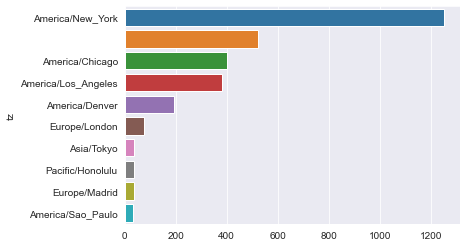

In [74]:
sns.barplot(y=top_tz.index, x=top_tz.values)

In [75]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

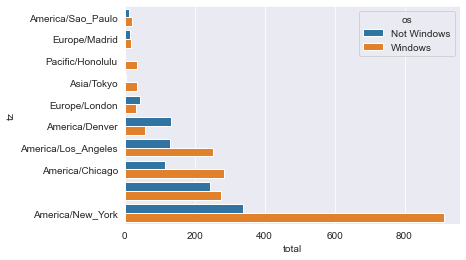

In [76]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

<AxesSubplot:xlabel='norm_total', ylabel='tz'>

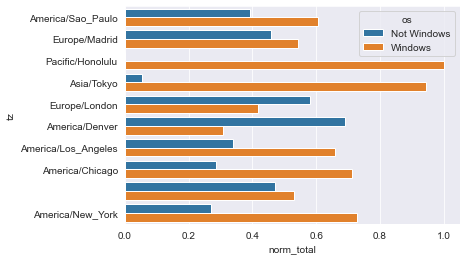

In [79]:
# 该图不容易看出较小组中Windows用户的相对百分比，因此可以将百分比归一化为1
def norm_total(group):
    group['norm_total'] = group.total / group.total.sum()
    return group


results = count_subset.groupby('tz').apply(norm_total)
sns.barplot(x='norm_total', y='tz', hue='os', data=results)

In [80]:
count_subset.head()

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0


In [81]:
# 可以通过transform和groupby方法有效地计算归一化只和
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64